In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

$t_0$ is 30 time steps, and $\sigma$ is 10 spacial steps

In [2]:
t0 = 30
sig = 10
imp0 = 377

Total spacial distance is 200 spacial steps and total time is 250 time steps.

In [3]:
size = 200
maxtime = 400

In [4]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (np.power(sig, 2.)))

## Source Term

In [5]:
ez = np.zeros(size)
hy = np.zeros(size)

ez_alltime = np.zeros((maxtime, size))
hy_alltime = np.zeros((maxtime, size))

for tt in range(maxtime):
    ez_alltime[tt] = ez
    hy_alltime[tt] = hy
    
    for mm in range(size-1):
        hy[size-1] = hy[size-2]
        hy[mm] = hy[mm]+(ez[mm+1]-ez[mm])/imp0
        
    for mm in range(1, size): 
        ez[0] = ez[1]
        ez[mm] = ez[mm] + (hy[mm] - hy[mm-1])*imp0
        
    ez[0] = gaussian(tt, t0, sig)

In [35]:
x = np.arange(0, size, 1)

def animate(i):
    ax.clear()
    ax.set_ylim(0, 1.1)
    ax.text(130, 1.03, 'Time Step: {}'.format(i), fontsize=20)
    ax.set_xlabel('Spacial Steps')
    ax.set_label(r'$E_z$ (V/m)')
    ax.grid()
    ax.plot(x, ez_alltime[i], lw = 5)

Below we relate time steps to "actual time" as viewed in the video. Since we are animating at 15 fps, each time step in this simulation is equivalent to 1/15th of a second in "actual time". 

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ani = animation.FuncAnimation(fig, animate, maxtime, interval=1e2, blit=False)
ani.save('test1.mp4', fps=30, dpi=300)
plt.close()

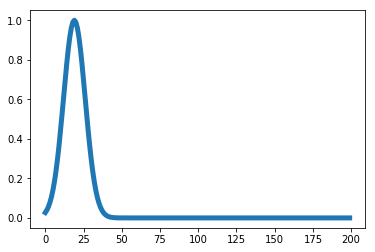

In [34]:
plt.plot(x, ez_alltime[50], lw=5)